# ESILV - Python-for-data-analysis - project-2022

## Import Library and Load Data

In [36]:
#First of all we import all the libraries that we will use in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix


#For Flask API
import pickle

In [37]:
#We create all the columns that we need
colums = ['F'+str(i) for i in range(1,11)]
colums_tot = ['F'+str(i) for i in range(1,11)]
colums_tot.append('class')
colums2=['F'+str(i) for i in range(1,11)]
colums2.append('mahalanobis')
label = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'W', 'X', 'Y']

In [38]:
# function to import data with name and columns= name
def TxtToPandas(colums,name):
  data = pd.read_csv(name, header = None)
  data.columns=colums
  return data

In [39]:
#import data
avilatrain=TxtToPandas(colums_tot,'avila-tr.txt')
avilatest=TxtToPandas(colums_tot,'avila-ts.txt')
#Split data between Values X and Y Class
Ytrain=avilatrain.iloc[:,10]
Xtrain=avilatrain.iloc[:, :-1]
Ytest=avilatest.iloc[:,10]
Xtest=avilatest.iloc[:, :-1]

## Data Visualisation before Cleaning


Text(0.5, 1.0, 'Repartion by author')

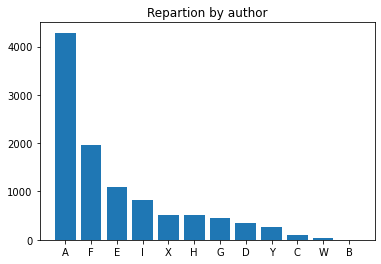

In [40]:
#We observe the repartition of trainning set between classes.
plt.bar(Ytrain.value_counts().keys(),Ytrain.value_counts().values)
plt.title("Repartion by author")

In [41]:
#In the description of the dataset, it was said that the data was already scaled using the Z-Normalized Method.
#In fact, all mean are very close to 0 
Xtrain.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541991,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


Text(0.5, 1.0, 'Boxplot from the first dataset')

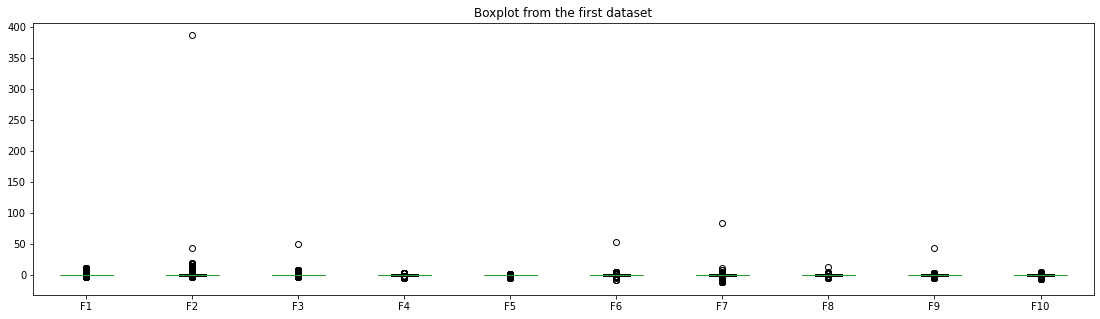

In [42]:
Xtrain.plot(kind='box',figsize=(19,5))
plt.title("Boxplot from the first dataset")
#And we visualize the boxplot of the dataset to delete all the inconsistent values.

## Data Cleaning

In [43]:
#On the graph above, we can observe an inconsistent value for F2. In this cell we delete all rows with F2>200
#While observing the data set, this row has also inconsistent values for F6 F7 and F9 too.
avilatrain2 = avilatrain.drop(avilatrain.index[avilatrain['F2'] > 200].tolist()) 
Ytrain2=avilatrain2.iloc[:,10]
Xtrain2=avilatrain2.iloc[:, :-1]

Text(0.5, 1.0, 'Boxplot after first Cleaning on F2')

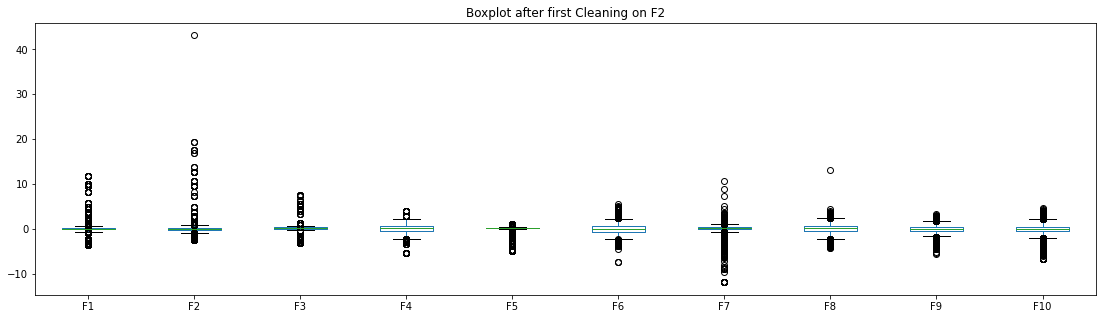

In [44]:
Xtrain2.plot(kind='box',figsize=(19,5))
plt.title("Boxplot after first Cleaning on F2")

In [45]:
#In a second time we plot the DataFrame without the rows which have been deleted above.
#We delete again some inconsistent rows on columns F2 and F8
avilatrain3 = avilatrain2.drop(avilatrain2.index[avilatrain2['F2'] > 30].tolist()) 
avilatrain3 = avilatrain2.drop(avilatrain2.index[avilatrain2['F8'] > 10].tolist()) 
Ytrain3=avilatrain3.iloc[:,10]
Xtrain3=avilatrain3.iloc[:, :-1]

Text(0.5, 1.0, 'Boxplot after second Cleaning on F2 and F8')

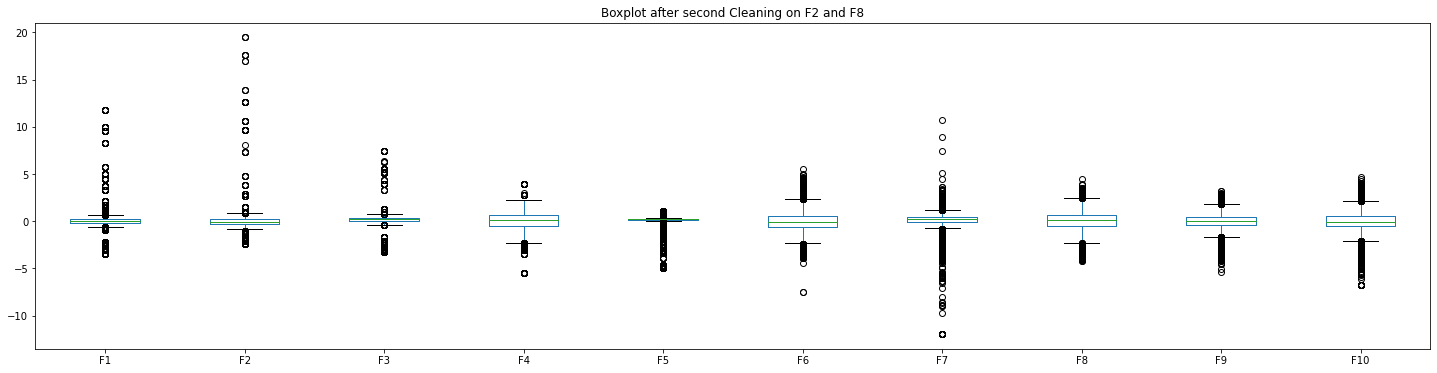

In [46]:
Xtrain3.plot(kind='box',figsize=(25,6))
plt.title("Boxplot after second Cleaning on F2 and F8")

In [47]:
Xtrain3.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000
mean,0.001188,-0.007535,-0.005012,-0.001882,0.006834,0.009608,-0.001208,0.009035,0.009223,0.001401
std,0.990934,0.953603,1.007133,1.007215,0.991016,0.997023,1.025651,0.995286,0.997380,1.005019
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.423855,-6.719324
25%,-0.128929,-0.261797,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.542021,-0.372457,-0.516086
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111735,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654915,0.500624,0.530794
max,11.819916,19.470188,7.458681,3.987152,1.066121,5.505495,10.714792,4.510897,3.244594,4.671232


In [48]:
#To determine all the inconsistent values in a DataFrame, the Mahalanobis distance is frequently used.
#Here is the function to calculate the mahalanobis distance for each row on a DataFrame
def mahalanobis(data=None,):
    data_mean = data - np.mean(data)
    cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(data_mean, inv_covmat)
    mahal = np.dot(left, data_mean.T)
    return mahal.diagonal()

Text(0.5, 1.0, 'Mahalanobis distance from the original dataset')

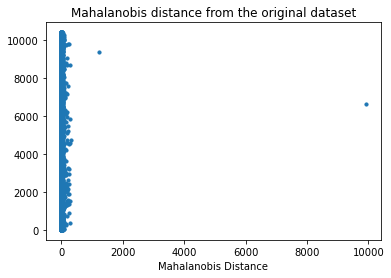

In [49]:
Xtrain['mahalanobis'] = mahalanobis(data=Xtrain)
plt.scatter(Xtrain['mahalanobis'],Xtrain.index,s=10)
plt.xlabel('Mahalanobis Distance')
plt.title("Mahalanobis distance from the original dataset")
#We observe well 2 points with a high Mahalanobis Distance.
#In reality they are already deleted above.

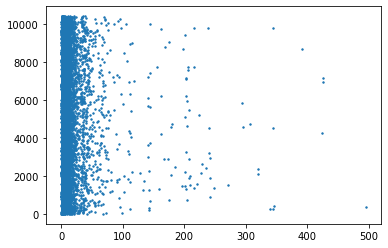

In [50]:
Xtrain3['mahalanobis'] = mahalanobis(data=Xtrain3)
plt.scatter(Xtrain3['mahalanobis'],Xtrain3.index,s=2)

In [51]:
#Finally we have decided to delete all rows which have a Mahalanobis Distance >260
avilatrainlast = avilatrain3.drop(Xtrain3.index[Xtrain3['mahalanobis'] > 260].tolist()) 
Ytrainlast=avilatrainlast.iloc[:,10]
Xtrainlast=avilatrainlast.iloc[:, :-1]

Text(0.5, 1.0, 'Mahalanobis distance from the final dataset')

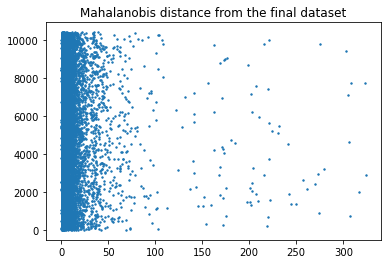

In [52]:
Xtrainlast['mahalanobis'] = mahalanobis(data=Xtrainlast)
plt.scatter(Xtrainlast['mahalanobis'],Xtrainlast.index,s=2)
plt.title("Mahalanobis distance from the final dataset")

#The DataFrame is now clean, so we are going to make some graph to analyse the Data

## Data Visualisation after Cleaning

In [53]:
Xtrainlast.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,mahalanobis
count,10412.000000,10412.000000,10412.000000,10412.000000,10412.000000,10412.000000,10412.000000,10412.000000,10412.000000,10412.000000,10412.000000
mean,0.005233,-0.026898,-0.003691,-0.002080,0.012657,0.011922,0.005206,0.007117,0.013307,0.007354,9.999040
std,0.984539,0.755476,1.005425,1.007562,0.977441,0.993583,0.979180,0.992506,0.991020,0.988920,21.518941
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.049677,-6.719324,0.159146
25%,-0.128929,-0.267686,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.542967,-0.341275,-0.513370,2.071338
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111172,0.064084,-0.032211,4.103691
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.653507,0.500624,0.532018,10.247644
max,11.819916,12.655362,7.458681,3.987152,1.066121,5.505495,8.902772,4.510897,3.244594,4.671232,323.717802


Text(0.5, 1.0, 'Correlation Matrix from the original dataset')

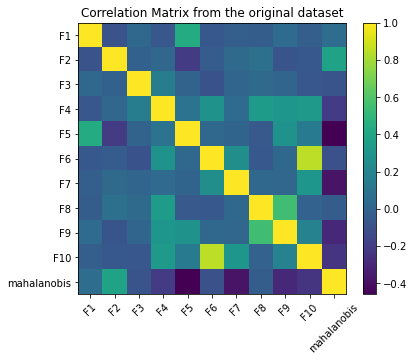

In [54]:
#To observe the DataFrame, we print the correlation matrix to see if some columns have a correlation between them
plt.figure(figsize=(6, 5))
plt.imshow(Xtrainlast.corr(), aspect='auto')
plt.xticks(range(Xtrainlast.shape[1]),colums2, rotation=45)
plt.yticks(range(Xtrainlast.shape[1]),colums2)
plt.colorbar()
plt.title("Correlation Matrix from the original dataset")

#On this correlation matrix, we can see a important correlation between columns F6 and F10 and between F9 and F8 

Text(0.5, 1.0, 'Correlation bewteen F6 and F10')

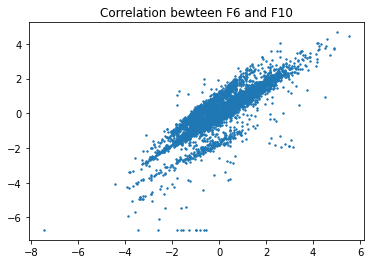

In [55]:
#In fact on this scatter plot, we can see very well the correlation bewteen F6 and F10
plt.scatter(Xtrainlast['F6'],Xtrainlast['F10'],s=2)
plt.title("Correlation bewteen F6 and F10")

In [56]:
del Xtrainlast['mahalanobis']
#We delete the column Mahalanobis because it is useless now 

Text(0.5, 1.0, 'PCA Method with the final dataset')

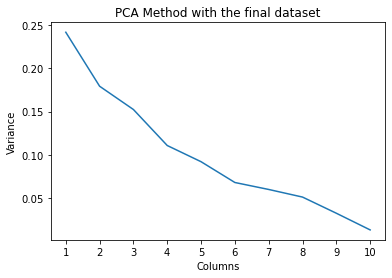

In [57]:
#To finish the Analyse Part, we do the PCA Method to determined the importance of all columns in the Prediction
pca = PCA()
principalComponents = pca.fit_transform(Xtrainlast)
plt.plot(pca.explained_variance_ratio_)
plt.xticks(np.arange(0, 10, step=1),range(1,11))
plt.ylabel('Variance')
plt.xlabel('Columns')
plt.title("PCA Method with the final dataset")
#We can said that F1, F2 and F3 are the most important columns in the DataFrame

## Machine Learning

In [58]:
#We initialize 4 dictionnaries to keep all values and to compare models at the end
accuracy_stock={}
precision_stock={}
recall_stock={}
f1_score_stock={}
Cross_validation={}
avilatrainlast
Full_Data_Frame= pd.concat([avilatrainlast,avilatest])
Yfull=Full_Data_Frame.iloc[:,10]
Xfull=Full_Data_Frame.iloc[:, :-1]

### Logistical Regression

In [59]:
#Logistic Regression
log_reg=LogisticRegression()
log_reg.fit(Xtrainlast, Ytrainlast)
pred=log_reg.predict(Xtest)
accuracy=accuracy_score(Ytest,pred)
precision, recall, f1_score, x = precision_recall_fscore_support(Ytest,pred, average='macro')
accuracy_stock["log_reg"]=accuracy
precision_stock["log_reg"]=precision
recall_stock["log_reg"]=recall
f1_score_stock["log_reg"]=f1_score
Cross_validation["log_reg"] = cross_val_score(log_reg, Xfull, Yfull, cv=5)
pd.DataFrame(confusion_matrix(Ytest,pred),columns =label, index=label).apply(pd.to_numeric).style.background_gradient(cmap='viridis')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS RE

,A,B,C,D,E,F,G,H,I,W,X,Y
A,3999,0,0,3,64,140,24,24,20,0,7,5
B,0,5,0,0,0,0,0,0,0,0,0,0
C,63,0,0,0,14,17,4,2,3,0,0,0
D,290,0,0,0,35,10,0,15,1,0,2,0
E,646,0,0,0,289,58,3,24,14,0,57,4
F,1731,0,0,1,15,168,10,16,15,0,1,5
G,323,0,0,0,14,36,12,58,0,0,4,0
H,278,0,0,0,54,49,2,124,11,0,1,1
I,40,0,0,0,5,14,0,8,723,0,23,19
W,30,0,0,0,10,0,0,0,0,3,2,0


### Logistical Regression PCA


In [60]:
#Logistic Regression PCA
log_reg_pca=LogisticRegression()
log_reg_pca.fit(principalComponents, Ytrainlast)
pred=log_reg_pca.predict(pca.transform(Xtest))
accuracy=accuracy_score(Ytest,pred)
precision, recall, f1_score, x = precision_recall_fscore_support(Ytest,pred, average='macro')
accuracy_stock["log_reg_pca"]=accuracy
precision_stock["log_reg_pca"]=precision
recall_stock["log_reg_pca"]=recall
f1_score_stock["log_reg_pca"]=f1_score
Cross_validation["log_reg_pca"] = cross_val_score(log_reg_pca, Xfull, Yfull, cv=5)
pd.DataFrame(confusion_matrix(Ytest,pred),columns =label, index=label).apply(pd.to_numeric).style.background_gradient(cmap='viridis')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS RE

,A,B,C,D,E,F,G,H,I,W,X,Y
A,4002,0,0,4,63,137,24,25,20,0,7,4
B,0,5,0,0,0,0,0,0,0,0,0,0
C,63,0,0,0,14,17,4,2,3,0,0,0
D,292,0,0,0,33,10,0,15,1,0,2,0
E,647,0,0,0,289,57,3,24,14,0,57,4
F,1731,0,0,1,15,168,10,16,15,0,1,5
G,323,0,0,0,14,36,11,59,0,0,4,0
H,278,0,0,0,53,49,2,125,11,0,1,1
I,40,0,0,0,5,14,0,8,722,0,24,19
W,30,0,0,0,10,0,0,0,0,3,2,0


### K Neighbors Classifier

In [61]:
#K Neighbors Classifier
n=[1,3,5,7]
accuracy=0
mat_conf=[]
besti=0
for i in n:

  knn = KNeighborsClassifier(i)
  knn.fit(Xtrainlast,Ytrainlast)
  pred= knn.predict(Xtest)
  accuracyi=accuracy_score(Ytest,pred)
  precisioni, recalli, f1_scorei, x = precision_recall_fscore_support(Ytest,pred, average='macro')
  mat_confi=confusion_matrix(Ytest,pred)
  if accuracy< accuracyi:
    accuracy,besti,precision, recall, f1_score,mat_conf=accuracyi,i,precisioni, recalli, f1_scorei,mat_confi
accuracy_stock["knn"]=accuracy
precision_stock["knn"]=precision
recall_stock["knn"]=recall
f1_score_stock["knn"]=f1_score
Cross_validation["knn"] = cross_val_score(knn, Xfull, Yfull, cv=5)
pd.DataFrame(mat_conf,columns =label, index=label).apply(pd.to_numeric).style.background_gradient(cmap='viridis')

,A,B,C,D,E,F,G,H,I,W,X,Y
A,3686,0,2,18,49,446,44,33,2,0,3,3
B,0,5,0,0,0,0,0,0,0,0,0,0
C,40,0,41,2,8,12,0,0,0,0,0,0
D,84,0,6,195,24,36,1,5,1,0,1,0
E,215,0,11,30,712,65,11,38,1,0,10,2
F,586,0,2,8,16,1305,32,11,2,0,0,0
G,131,0,0,0,22,52,235,6,0,0,1,0
H,145,0,5,3,41,41,8,276,0,0,1,0
I,26,0,0,2,4,3,1,1,788,0,1,6
W,12,0,0,0,3,1,0,0,0,27,2,0


### Random Forest

In [62]:
#Random Forest
rand_for=RandomForestClassifier()
rand_for.fit(Xtrainlast,Ytrainlast)
pred=rand_for.predict(Xtest)
accuracy=accuracy_score(Ytest,pred)
precision, recall, f1_score, x = precision_recall_fscore_support(Ytest,pred, average='macro')
accuracy_stock["rand_for"]=accuracy
precision_stock["rand_for"]=precision
recall_stock["rand_for"]=recall
f1_score_stock["rand_for"]=f1_score
Cross_validation["rand_for"] = cross_val_score(rand_for, Xfull, Yfull, cv=5)
pd.DataFrame(confusion_matrix(Ytest,pred),columns =label, index=label).apply(pd.to_numeric).style.background_gradient(cmap='viridis')

,A,B,C,D,E,F,G,H,I,W,X,Y
A,4260,0,0,0,2,16,2,4,2,0,0,0
B,0,5,0,0,0,0,0,0,0,0,0,0
C,5,0,98,0,0,0,0,0,0,0,0,0
D,0,0,0,346,7,0,0,0,0,0,0,0
E,22,0,0,0,1069,2,0,0,0,0,2,0
F,48,0,0,0,3,1909,2,0,0,0,0,0
G,14,0,0,0,3,1,429,0,0,0,0,0
H,20,0,3,0,2,0,0,495,0,0,0,0
I,3,0,0,0,0,0,0,0,829,0,0,0
W,0,0,0,0,0,0,0,0,0,45,0,0


### Random Forest PCA

In [63]:
#Random Forest PCA
rand_for_pca=RandomForestClassifier()
rand_for_pca.fit(principalComponents, Ytrainlast)
pred=rand_for_pca.predict(pca.transform(Xtest))
accuracy=accuracy_score(Ytest,pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(Ytest,pred, average='macro')
accuracy_stock["rand_for_pca"]=accuracy
precision_stock["rand_for_pca"]=precision
recall_stock["rand_for_pca"]=recall
f1_score_stock["rand_for_pca"]=f1_score
Cross_validation["rand_for_pca"] = cross_val_score(rand_for_pca, Xfull, Yfull, cv=5)
pd.DataFrame(confusion_matrix(Ytest,pred),columns =label, index=label).apply(pd.to_numeric).style.background_gradient(cmap='viridis')

,A,B,C,D,E,F,G,H,I,W,X,Y
A,3921,0,0,7,31,247,34,25,13,0,4,4
B,0,5,0,0,0,0,0,0,0,0,0,0
C,33,0,26,1,22,16,0,1,4,0,0,0
D,93,0,0,169,57,27,1,3,1,0,1,1
E,176,0,1,6,805,55,5,23,2,0,13,9
F,691,0,0,1,15,1208,29,7,4,0,1,6
G,122,0,0,0,25,33,259,6,0,0,2,0
H,148,0,3,0,42,24,11,289,2,0,1,0
I,35,0,0,1,2,5,0,1,786,0,2,0
W,21,0,0,0,1,0,0,0,0,22,1,0


In [64]:
#Search of better parameters in param_grid
param_grid = {'bootstrap': [True],
 'max_depth': [20, 40, 80, None],
 'min_samples_leaf': [1, 2],
 'n_estimators': [10,40,80]}
grid = GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
grid.fit(Xtrainlast,Ytrainlast)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [20, 40, 80, None],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [10, 40, 80]})

In [65]:
#Application of the params on a Random Forest Algorithms
rand_for_grid = RandomForestClassifier()
rand_for_grid.set_params(**grid.best_params_)
rand_for_grid.fit(Xtrainlast,Ytrainlast)
Cross_validation["rand_for_grid"] = cross_val_score(rand_for_grid, Xfull, Yfull, cv=5)

## Conclusion

In [66]:
print("Summarize Result xith values of all Models\n")
print('Model         |    Accuracy\t|\tPrecision\t|\t recall \t|\tf1_score\t|')
for i in accuracy_stock.keys(): 
  print(i,end='')
  for a in range(len(i),14):
    print(' ', end='')
  print('|    '+str(round(accuracy_stock[i],6))+'\t',end='')
  print('|\t'+str(round(precision_stock[i],6))+'\t',end='')
  print('|\t'+str(round(recall_stock[i],7))+'\t',end='')
  print('|\t'+str(round(f1_score_stock[i],7))+'\t|')

Summarize Result xith values of all Models

Model         |    Accuracy	|	Precision	|	 recall 	|	f1_score	|
log_reg       |    0.561751	|	0.481157	|	0.4025752	|	0.4089718	|
log_reg_pca   |    0.562135	|	0.480602	|	0.4028264	|	0.4090753	|
knn           |    0.757497	|	0.812033	|	0.6929663	|	0.7413758	|
rand_for      |    0.982754	|	0.990301	|	0.978733	|	0.9844198	|
rand_for_pca  |    0.77963	|	0.858683	|	0.6813783	|	0.7386029	|


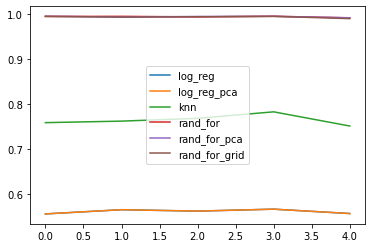

In [67]:
plt.plot(Cross_validation['log_reg'],label='log_reg')
plt.plot(Cross_validation['log_reg_pca'],label='log_reg_pca')
plt.plot(Cross_validation['knn'],label='knn')
plt.plot(Cross_validation['rand_for'],label='rand_for')
plt.plot(Cross_validation['rand_for_pca'],label='rand_for_pca')
plt.plot(Cross_validation['rand_for_grid'],label='rand_for_grid')
plt.legend()

To conclude this Project,we can observe all results from all models that we have build.

We can observate that the Random Forest is the better Method for this DataFrame with a accuray around 0.99.

In fact on each values (accuracy, precision, recall and f1_score), it is the better algorithm.

And with the Cross Validation, we can see that the 3 random Forest Methods have a very good Cross Validation.

## Pickle for Flask API

In [68]:
pickle.dump(rand_for,open("api/rand_for.pkl","wb"))